In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df=pd.read_excel("C:\\Users\\Welcome\\Desktop\\dataset.xlsx")
df

,maths score,reading score,writing score,placement score,placement offer count
0,80,68,70,89,3
1,71,61,85,91,3
2,79,16,87,77,2
3,61,77,74,76,2
4,78,71,67,90,3
5,73,68,90,80,2
6,77,62,70,35,2
7,74,45,80,12,1
8,76,60,79,77,2
9,75,65,85,87,3


In [19]:
col = ['maths score', 'reading score' , 'writing score','placement score']
df.boxplot(col)

<Axes: >

In [20]:
print(np.where(df['maths score']>90))
print(np.where(df['reading score']<25))
print(np.where(df['writing score']<30))

(array([10], dtype=int64),)
(array([2], dtype=int64),)
(array([10], dtype=int64),)


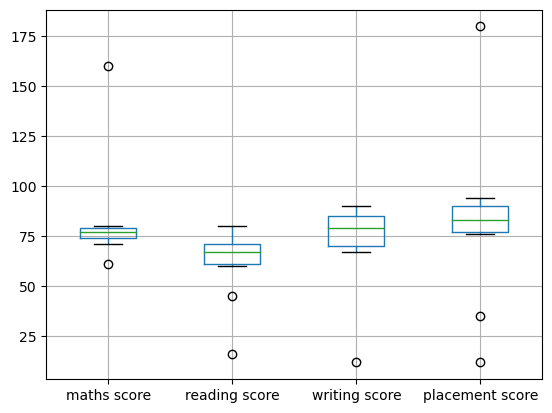

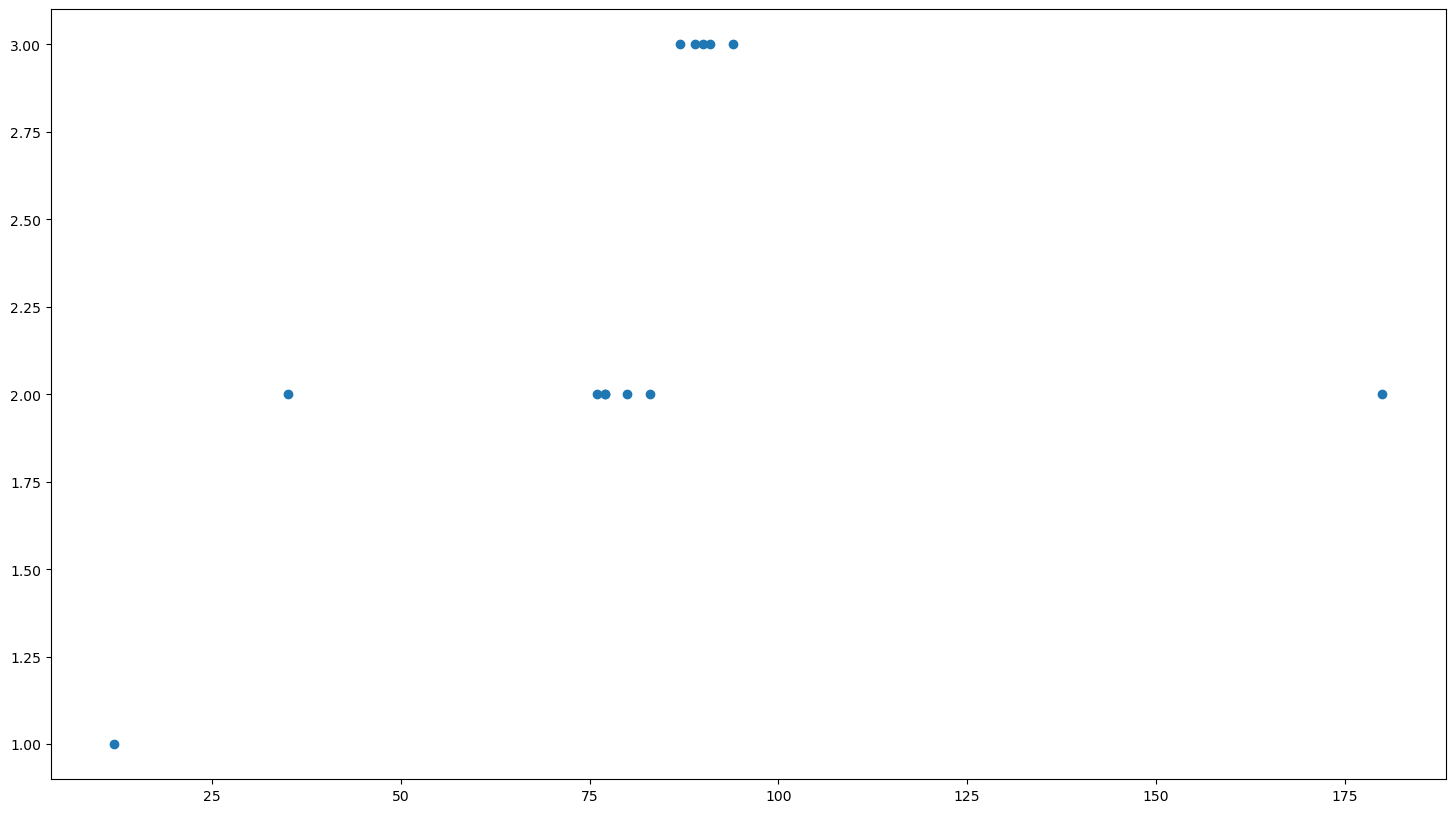

In [21]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['placement score'], df['placement offer count'])
plt.show()

In [22]:
print(np.where((df['placement score']<50) & (df['placement offer count']>1)))
print(np.where((df['placement score']>85) & (df['placement offer count']<3)))


(array([6], dtype=int64),)
(array([11], dtype=int64),)


In [23]:
#USING Z SCORE METHOD
from scipy import stats

In [25]:
z = np.abs(stats.zscore(df['maths score']))
print(z)

0     0.076560
1     0.466020
2     0.119834
3     0.898753
4     0.163107
5     0.379473
6     0.206380
7     0.336200
8     0.249653
9     0.292927
10    3.385301
11    0.119834
12    0.076560
Name: maths score, dtype: float64


In [26]:
threshold = 0.18
sample_outliers = np.where(z <threshold)
sample_outliers


(array([ 0,  2,  4, 11, 12], dtype=int64),)

In [27]:
# USING INTER QUARTILE RANGE

In [28]:
sorted_rscore= sorted(df['reading score'])
sorted_rscore

[16, 45, 60, 61, 62, 65, 67, 68, 68, 71, 72, 77, 80]

In [29]:
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

61.0 71.0


In [30]:
IQR = q3-q1

In [31]:
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

46.0 86.0


In [33]:
r_outliers = []
for i in sorted_rscore:
    if (i<lwr_bound or i>upr_bound):
        r_outliers.append(i)
print(r_outliers)

[16, 45]
